### 手动实现线性回归

- 数据流水线
- 模型
- 定义损失函数
- 小批量梯度下降算法


假设y=Xw+b+σ，本身的权重为w=[2, -3.4]，偏置为b=4.2，σ服从均值为0，标准差为0.01的正态分布。

我们要通过编程恢复函数的本来样子。




features: tensor([[-0.7294,  0.8728],
        [-0.1014,  1.6604],
        [-0.1705, -1.3976],
        ...,
        [ 0.8397,  0.5644],
        [-0.3819,  0.0602],
        [-0.9950,  0.4447]]) 
label: tensor([[-2.3880e-01],
        [-1.6371e+00],
        [ 8.6299e+00],
        [ 5.8909e+00],
        [ 2.2233e+00],
        [ 4.1936e+00],
        [ 5.2845e+00],
        [ 1.5233e+01],
        [ 7.6228e+00],
        [ 3.2875e+00],
        [ 1.1632e+00],
        [ 7.1242e+00],
        [ 2.1306e+00],
        [-4.8967e-01],
        [ 8.4445e+00],
        [ 7.9102e+00],
        [ 2.7136e+00],
        [-6.4955e-01],
        [ 8.8378e+00],
        [ 1.4184e-01],
        [ 3.3093e+00],
        [ 3.3987e+00],
        [-5.9558e+00],
        [ 1.3362e+00],
        [ 5.3074e+00],
        [ 9.8517e+00],
        [ 7.3472e+00],
        [ 3.6713e+00],
        [ 7.2929e+00],
        [ 6.4177e+00],
        [ 5.7255e+00],
        [ 5.8247e+00],
        [ 2.1646e+00],
        [ 4.1054e+00],
        [ 1.3357e+

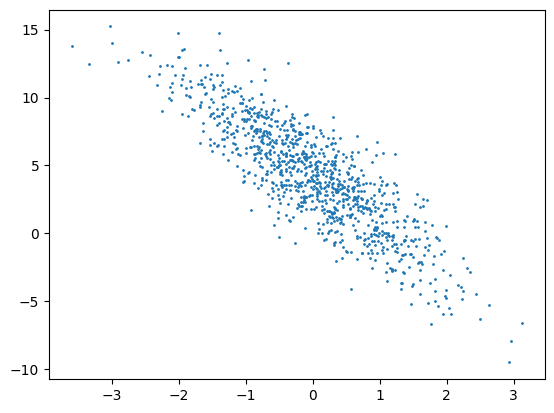

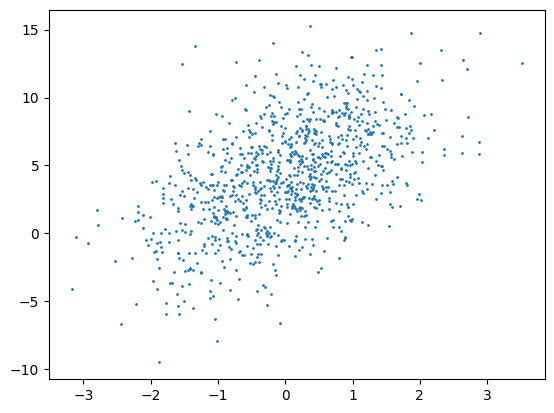

In [9]:
import torch


def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features, '\nlabel:', labels)

# 画图
import matplotlib.pyplot as plt
plt.scatter(features[:, 1].detach().numpy(), labels.numpy(), 1)
plt.show()

plt.scatter(features[:, 0].detach().numpy(), labels.numpy(), 1)
plt.show()

In [11]:
import random

### 读取数据

# 分步读取，并非一次读取，避免内存溢出
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 打乱数据
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 100
for X, y in data_iter(batch_size, features, labels):
    print(X, y)

tensor([[-1.0396e+00,  2.4890e+00],
        [ 2.7612e-01, -1.9561e+00],
        [-1.0172e-01, -2.7421e-01],
        [-6.6997e-01, -8.7962e-01],
        [-5.6941e-01,  9.4777e-01],
        [ 2.2671e-01,  4.0325e-01],
        [ 1.3901e-01,  7.6265e-01],
        [-1.1513e+00, -4.0563e-01],
        [-7.0780e-01,  2.2287e+00],
        [ 1.5642e+00,  4.4438e-01],
        [ 1.2817e+00,  9.1863e-01],
        [-5.7421e-01, -5.2888e-01],
        [ 1.0096e-01,  7.4876e-01],
        [-7.2481e-02,  7.1613e-01],
        [-8.6166e-01,  8.2960e-01],
        [ 2.0057e-01, -7.5387e-01],
        [ 8.0413e-01, -9.7405e-01],
        [-1.4335e-01,  2.0436e+00],
        [ 1.8001e+00,  2.2254e-01],
        [ 2.4329e-01, -8.6504e-01],
        [-1.4904e+00,  3.2507e-01],
        [-6.2879e-01,  2.0468e-01],
        [ 9.5102e-01,  6.8058e-01],
        [ 8.9261e-01,  1.4890e+00],
        [-2.2437e-01, -1.8963e+00],
        [-1.7674e-01, -2.9935e+00],
        [ 4.5939e-01,  3.0824e-01],
        [ 9.0305e-01, -9.939

In [14]:
## 初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 定义模型
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b

# 定义损失函数
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2


# 小批量梯度下降
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()


"""
计算过程：
0. 初始化参数，如权重w、偏置b
1. 读取一小批量训练样本，通过模型获得一组预测。
2. 计算损失后，启动反向传播，存储每个参数的梯度。
3. 调用优化算法sgd更新模型参数。
4. 重复训练直到完成。
"""

# 创建数据
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

lr = 0.01
num_epochs = 1000
net= linreg # 模型
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

w, b




epoch 1, loss 14.007244
epoch 2, loss 11.365112
epoch 3, loss 9.221402
epoch 4, loss 7.482105
epoch 5, loss 6.070900
epoch 6, loss 4.925944
epoch 7, loss 3.996969
epoch 8, loss 3.243144
epoch 9, loss 2.631584
epoch 10, loss 2.135355
epoch 11, loss 1.732710
epoch 12, loss 1.406001
epoch 13, loss 1.140915
epoch 14, loss 0.925830
epoch 15, loss 0.751296
epoch 16, loss 0.609667
epoch 17, loss 0.494734
epoch 18, loss 0.401484
epoch 19, loss 0.325814
epoch 20, loss 0.264413
epoch 21, loss 0.214589
epoch 22, loss 0.174154
epoch 23, loss 0.141342
epoch 24, loss 0.114715
epoch 25, loss 0.093107
epoch 26, loss 0.075572
epoch 27, loss 0.061342
epoch 28, loss 0.049794
epoch 29, loss 0.040422
epoch 30, loss 0.032815
epoch 31, loss 0.026643
epoch 32, loss 0.021633
epoch 33, loss 0.017568
epoch 34, loss 0.014268
epoch 35, loss 0.011590
epoch 36, loss 0.009417
epoch 37, loss 0.007653
epoch 38, loss 0.006221
epoch 39, loss 0.005059
epoch 40, loss 0.004116
epoch 41, loss 0.003350
epoch 42, loss 0.002729

(tensor([[ 1.9999],
         [-3.3999]], requires_grad=True),
 tensor([4.1997], requires_grad=True))

In [11]:
### 使用pytorch提供的api计算

import numpy as np
import torch
from torch.utils import data

def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))


def load_data(data_arrays, batch_size, is_train=True):
    """
    构造一个PyTorch的数据迭代器
    :param data_arrays:
    :param batch_size:
    :param is_train:
    :return:
    """
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

true_w, true_b = torch.tensor([2, -3.4]), 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
batch_size = 10
train_iter = load_data((features, labels), batch_size)

"""
模型定义的简化方案：
- 对于标准深度学习模型，可以服用框架定义好的层，只需要关注用哪些层构造模型，不必关注实现细节
- Sequential: 会将多个层连在一起，输入先传入第一层，输入将第一层输出作为第二层的输入，以此类推

对于线性模型来说，其是一个全连接层（表示所有输入与神经元相连），在PyTorch中，全连接层由 nn.Linear定义。

由两个参数：
- 输入特征的形状
- 输出特征的形状
"""

from torch import nn

# 以下代码与linreg等效，定义了一层（通常不计输入层），由Sequential包装
net = nn.Sequential(nn.Linear(2,1))

# 设置初始权重和偏置
net[0].weight.data.normal_(0, 0.01) # 权重设置为平均数为0，标准差为0.01的正太分布，是一个矩阵
net[0].bias.data.fill_(0) # 偏置设置为0

### 定义损失函数
loss = nn.MSELoss() # 损失函数为均方误差。所有误差的平方求和再取均值


# 这里就算出了损失函数的值（根据我们设置的初始值计算的）
# loss(net(X), y)


# 定义优化算法
"""
算法类型：小批量随机梯度下降（SGD），PyTorch通过optim模块提供了很多变体

实例化SGD的时候，传入参数和超参数完成配置。
"""
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

print(train_iter)

num_epochs = 100
### 训练的实现
for i in range(num_epochs):
    for X, y in train_iter:
        l = loss(net(X), y)
        trainer.zero_grad() # 重置所有已优化参数的梯度，因为样本是独立的，所以每次迭代，都要清零梯度
        l.backward() # 反向传播
        trainer.step() # 更新参数

    l = loss(net(features), labels)
    print(f'epoch {i + 1}, loss {l:f}')

### 查看参数 net的索引就是层的索引
net[0].weight.data, net[0].bias.data

epoch 1, loss 0.000187
epoch 2, loss 0.000099
epoch 3, loss 0.000099
epoch 4, loss 0.000099
epoch 5, loss 0.000099
epoch 6, loss 0.000099
epoch 7, loss 0.000099
epoch 8, loss 0.000099
epoch 9, loss 0.000099
epoch 10, loss 0.000099
epoch 11, loss 0.000100
epoch 12, loss 0.000100
epoch 13, loss 0.000099
epoch 14, loss 0.000099
epoch 15, loss 0.000100
epoch 16, loss 0.000099
epoch 17, loss 0.000099
epoch 18, loss 0.000099
epoch 19, loss 0.000099
epoch 20, loss 0.000099
epoch 21, loss 0.000099
epoch 22, loss 0.000099
epoch 23, loss 0.000099
epoch 24, loss 0.000099
epoch 25, loss 0.000099
epoch 26, loss 0.000099
epoch 27, loss 0.000099
epoch 28, loss 0.000099
epoch 29, loss 0.000099
epoch 30, loss 0.000099
epoch 31, loss 0.000100
epoch 32, loss 0.000099
epoch 33, loss 0.000099
epoch 34, loss 0.000099
epoch 35, loss 0.000099
epoch 36, loss 0.000100
epoch 37, loss 0.000099
epoch 38, loss 0.000099
epoch 39, loss 0.000099
epoch 40, loss 0.000100
epoch 41, loss 0.000100
epoch 42, loss 0.000099
e

(tensor([[ 2.0004, -3.4009]]), tensor([4.2006]))

In [14]:

### 完整的流程
import torch
from torch import nn

# 1. 数据生成
true_w= torch.tensor([2, -3.4])
true_b = 4.2

def synthetic_data(w, b, num_examples):
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))

# 2. 小批量梯度下降数据分割
batch_size = 10

def data_iter(batch_size, features, labels):
    data = torch.utils.data.TensorDataset(features, labels)
    return torch.utils.data.DataLoader(data, batch_size, shuffle=True)

# 3. 定义层(模型)
net = nn.Sequential(nn.Linear(2, 1))

# 4. 定义损失函数
loss = nn.MSELoss()

# 5. 定义优化算法
optimizer = torch.optim.SGD(net.parameters(), lr=0.03)

# 6. 训练
num_epochs = 100
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()

    l = loss(net(features), labels.view(-1, 1))
    print('epoch %d, loss: %f' % (epoch + 1, l.item()))

# 7. 查看模型参数
print('w:', net[0].weight.data)
print('b:', net[0].bias.data)


# 8.打印偏差
print("w偏差", net[0].weight.data - true_w.reshape(net[0].weight.data.shape))
print("b偏差", net[0].bias.data - true_b)

epoch 1, loss: 0.000201
epoch 2, loss: 0.000100
epoch 3, loss: 0.000100
epoch 4, loss: 0.000099
epoch 5, loss: 0.000100
epoch 6, loss: 0.000099
epoch 7, loss: 0.000100
epoch 8, loss: 0.000099
epoch 9, loss: 0.000099
epoch 10, loss: 0.000099
epoch 11, loss: 0.000101
epoch 12, loss: 0.000099
epoch 13, loss: 0.000099
epoch 14, loss: 0.000099
epoch 15, loss: 0.000100
epoch 16, loss: 0.000100
epoch 17, loss: 0.000099
epoch 18, loss: 0.000100
epoch 19, loss: 0.000099
epoch 20, loss: 0.000099
epoch 21, loss: 0.000099
epoch 22, loss: 0.000099
epoch 23, loss: 0.000100
epoch 24, loss: 0.000099
epoch 25, loss: 0.000099
epoch 26, loss: 0.000099
epoch 27, loss: 0.000100
epoch 28, loss: 0.000100
epoch 29, loss: 0.000100
epoch 30, loss: 0.000100
epoch 31, loss: 0.000099
epoch 32, loss: 0.000099
epoch 33, loss: 0.000099
epoch 34, loss: 0.000099
epoch 35, loss: 0.000099
epoch 36, loss: 0.000099
epoch 37, loss: 0.000099
epoch 38, loss: 0.000099
epoch 39, loss: 0.000100
epoch 40, loss: 0.000099
epoch 41,